<a href="https://colab.research.google.com/github/cdevrywhr/Data-Scientist-with-R/blob/main/Market_Basket_Analysis_(Asosiasi_Algoritma_2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data manipulation 
install.packages("dplyr")
install.packages("plyr")
#algoritma asosiasi
install.packages("arules")
install.packages("arulesViz")

In [7]:
library (arules)
library (arulesViz)
library(dplyr)
library(plyr)

**Data Preprossesing**

In [10]:
data_sort <- read.csv('bread basket.csv')

In [11]:
head(data_sort)

,Transaction,Item,date_time,period_day,weekday_weekend
,<int>,<chr>,<chr>,<chr>,<chr>
1,1,Bread,30-10-2016 09:58,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,2,Scandinavian,30-10-2016 10:05,morning,weekend
4,3,Hot chocolate,30-10-2016 10:07,morning,weekend
5,3,Jam,30-10-2016 10:07,morning,weekend
6,3,Cookies,30-10-2016 10:07,morning,weekend


In [12]:
str(data_sort)

'data.frame':	20507 obs. of  5 variables:
 $ Transaction    : int  1 2 2 3 3 3 4 5 5 5 ...
 $ Item           : chr  "Bread" "Scandinavian" "Scandinavian" "Hot chocolate" ...
 $ date_time      : chr  "30-10-2016 09:58" "30-10-2016 10:05" "30-10-2016 10:05" "30-10-2016 10:07" ...
 $ period_day     : chr  "morning" "morning" "morning" "morning" ...
 $ weekday_weekend: chr  "weekend" "weekend" "weekend" "weekend" ...


In [14]:
sorted <- data_sort[order(data_sort$Transaction),]
sorted$Transaction <- as.numeric(sorted$Transaction)
str(sorted)

'data.frame':	20507 obs. of  5 variables:
 $ Transaction    : num  1 2 2 3 3 3 4 5 5 5 ...
 $ Item           : chr  "Bread" "Scandinavian" "Scandinavian" "Hot chocolate" ...
 $ date_time      : chr  "30-10-2016 09:58" "30-10-2016 10:05" "30-10-2016 10:05" "30-10-2016 10:07" ...
 $ period_day     : chr  "morning" "morning" "morning" "morning" ...
 $ weekday_weekend: chr  "weekend" "weekend" "weekend" "weekend" ...


In [15]:
itemList <- ddply(sorted, c("Transaction","date_time"), 
                  function(df1)
                      paste(df1$Item, collapse = ","))
head(itemList,10)

,Transaction,date_time,V1
,<dbl>,<chr>,<chr>
1,1,30-10-2016 09:58,Bread
2,2,30-10-2016 10:05,"Scandinavian,Scandinavian"
3,3,30-10-2016 10:07,"Hot chocolate,Jam,Cookies"
4,4,30-10-2016 10:08,Muffin
5,5,30-10-2016 10:13,"Coffee,Pastry,Bread"
6,6,30-10-2016 10:16,"Medialuna,Pastry,Muffin"
7,7,30-10-2016 10:19,"Medialuna,Pastry,Coffee,Tea"
8,8,30-10-2016 10:20,"Pastry,Bread"
9,9,30-10-2016 10:21,"Bread,Muffin"


In [16]:
itemList$Transaction <- NULL
itemList$date_time <- NULL
itemList$period_day <- NULL
itemList$weekday_weekend <- NULL

head(itemList,5)

,V1
,<chr>
1,Bread
2,"Scandinavian,Scandinavian"
3,"Hot chocolate,Jam,Cookies"
4,Muffin
5,"Coffee,Pastry,Bread"


In [17]:
colnames (itemList) <- c("itemList")

In [18]:
write.csv(itemList, "itemList.csv", quote=FALSE, row.names=TRUE)
head(itemList, 10)

,itemList
,<chr>
1,Bread
2,"Scandinavian,Scandinavian"
3,"Hot chocolate,Jam,Cookies"
4,Muffin
5,"Coffee,Pastry,Bread"
6,"Medialuna,Pastry,Muffin"
7,"Medialuna,Pastry,Coffee,Tea"
8,"Pastry,Bread"
9,"Bread,Muffin"


**Apriori Algorthm**

In [ ]:
tr <- read.transactions(file= "itemList.csv", format="basket", sep=",", cols=1)

In [30]:
inspect(head(tr))

    items                         transactionID
[1] {itemList}                                 
[2] {Bread}                       1            
[3] {Scandinavian}                2            
[4] {Cookies, Hot chocolate, Jam} 3            
[5] {Muffin}                      4            
[6] {Bread, Coffee, Pastry}       5            


In [49]:
inspect(apriori(tr, parameter=list(support=10/length(tr), minlen=2, maxlen=3, target='frequent itemsets')))
read.transactions(file="itemList.csv", format="single", sep="\t", cols=c(1,2), skip=1)


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime     support minlen
         NA    0.1    1 none FALSE            TRUE       5 0.001056412      2
 maxlen            target  ext
      3 frequent itemsets TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[105 item(s), 9466 transaction(s)] done [0.00s].
sorting and recoding items ... [55 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3

Warning message in apriori(tr, parameter = list(support = 10/length(tr), minlen = 2, :
“Mining stopped (maxlen reached). Only patterns up to a length of 3 returned!”


 done [0.01s].
sorting transactions ... done [0.00s].
writing ... [410 set(s)] done [0.00s].
creating S4 object  ... done [0.00s].
      items                                 support     count
[1]   {Bread, Eggs}                         0.001478977  14  
[2]   {Coffee, Granola}                     0.001795901  17  
[3]   {Coffee, Tartine}                     0.003063596  29  
[4]   {Bread, Focaccia}                     0.002007184  19  
[5]   {Bakewell, Tea}                       0.001267695  12  
[6]   {Bakewell, Bread}                     0.001162054  11  
[7]   {Bakewell, Coffee}                    0.003063596  29  
[8]   {Cake, Vegan mincepie}                0.001267695  12  
[9]   {Bread, Vegan mincepie}               0.001373336  13  
[10]  {Coffee, Vegan mincepie}              0.003169237  30  
[11]  {Art Tray, Tea}                       0.001162054  11  
[12]  {Art Tray, Coffee}                    0.002746672  26  
[13]  {Extra Salami or Feta, Salad}         0.001690260  16  
[

transactions in sparse format with
 3286 transactions (rows) and
 3286 items (columns)

In [43]:
data_item <- itemFrequency(tr, type="absolute")
data_item <- sort(data_item, decreasing = TRUE)
print(data_item)

                                              Coffee 
                                                4526 
                                               Bread 
                                                3094 
                                                 Tea 
                                                1349 
                                                Cake 
                                                 983 
                                              Pastry 
                                                 814 
                                            Sandwich 
                                                 680 
                                           Medialuna 
                                                 584 
                                       Hot chocolate 
                                                 552 
                                             Cookies 
                                                 514 
                            

In [44]:
data_item <- data_item[1:15]
data_item <- data.frame("Nama Produk"=names(data_item), "Jumlah"=data_item, row.names = NULL)
print(data_item)

     Nama.Produk Jumlah
1         Coffee   4526
2          Bread   3094
3            Tea   1349
4           Cake    983
5         Pastry    814
6       Sandwich    680
7      Medialuna    584
8  Hot chocolate    552
9        Cookies    514
10       Brownie    378
11    Farm House    371
12         Juice    364
13        Muffin    362
14     Alfajores    344
15         Scone    327


In [52]:
apriori_rules <- apriori(tr, parameter=list(supp=10/length(tr), conf=0.1, minlen=3))
apriori_rules <- head(sort(apriori_rules, by='count', decreasing = T), n=500)
options(max.print = 50000000)
inspect(apriori_rules)


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime     support minlen
        0.1    0.1    1 none FALSE            TRUE       5 0.001056412      3
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 10 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[105 item(s), 9466 transaction(s)] done [0.00s].
sorting and recoding items ... [55 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 done [0.00s].
writing ... [326 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
      lhs                                rhs                    support    
[1]   {Bread, Pastry}                 => {Coffee}               0.011197972
[2]   {Coffee, Pastry}                => {Bread}                0.011197972
[3]   {Bread, Coffee}                 => {Pastry} 

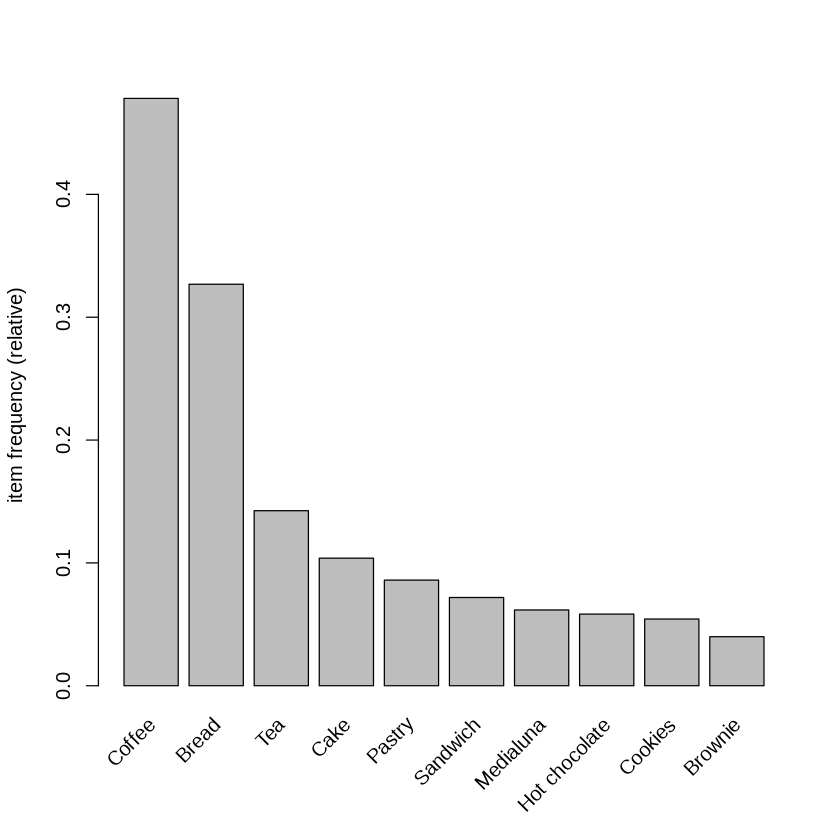

In [55]:
itemFrequencyPlot(tr, topN=10)

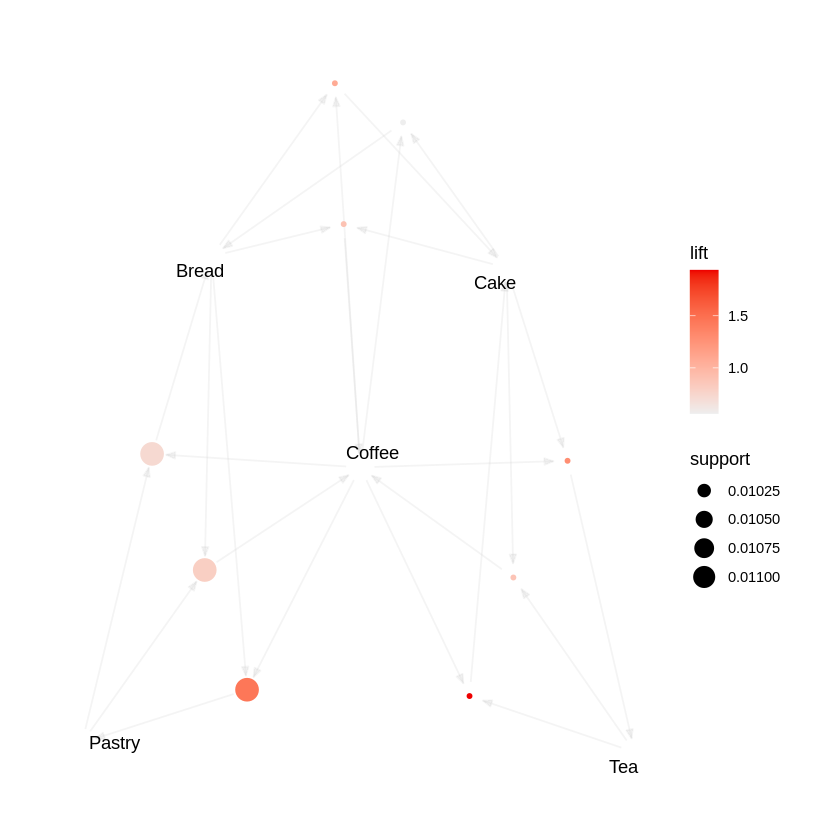

In [53]:
plot(apriori_rules[1:9], method="graph")

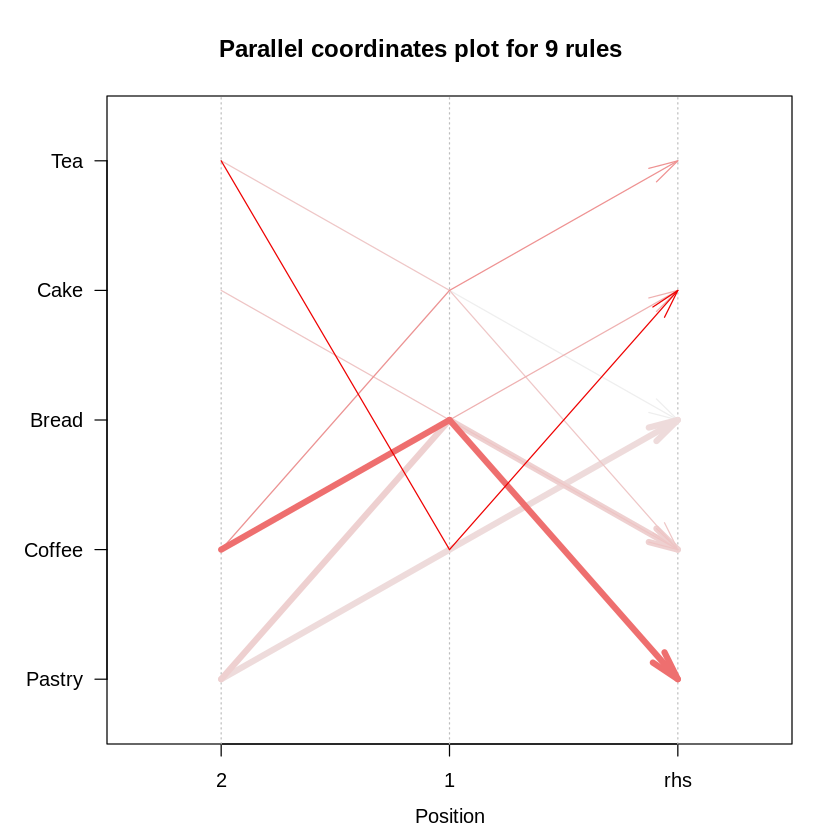

In [56]:
plot(apriori_rules[1:9], method="paracoord")

**Mencari asosiasi per produk**
**example Tea**

     lhs      rhs                 support     confidence  coverage lift     
[1]  {Tea} => {Coffee}            0.049862666 0.349888807 0.14251  0.7317825
[2]  {Tea} => {Bread}             0.028100570 0.197183099 0.14251  0.6032758
[3]  {Tea} => {Cake}              0.023769280 0.166790215 0.14251  1.6061406
[4]  {Tea} => {Sandwich}          0.014367209 0.100815419 0.14251  1.4034099
[5]  {Tea} => {Cookies}           0.009718994 0.068198666 0.14251  1.2559700
[6]  {Tea} => {Pastry}            0.009613353 0.067457376 0.14251  0.7844613
[7]  {Tea} => {Soup}              0.009085147 0.063750927 0.14251  1.8511235
[8]  {Tea} => {Scone}             0.008345658 0.058561898 0.14251  1.6952505
[9]  {Tea} => {Medialuna}         0.008028734 0.056338028 0.14251  0.9131777
[10] {Tea} => {Hot chocolate}     0.008028734 0.056338028 0.14251  0.9661155
[11] {Tea} => {Juice}             0.007077963 0.049666420 0.14251  1.2915998
[12] {Tea} => {Alfajores}         0.006761040 0.047442550 0.14251  1.3054976

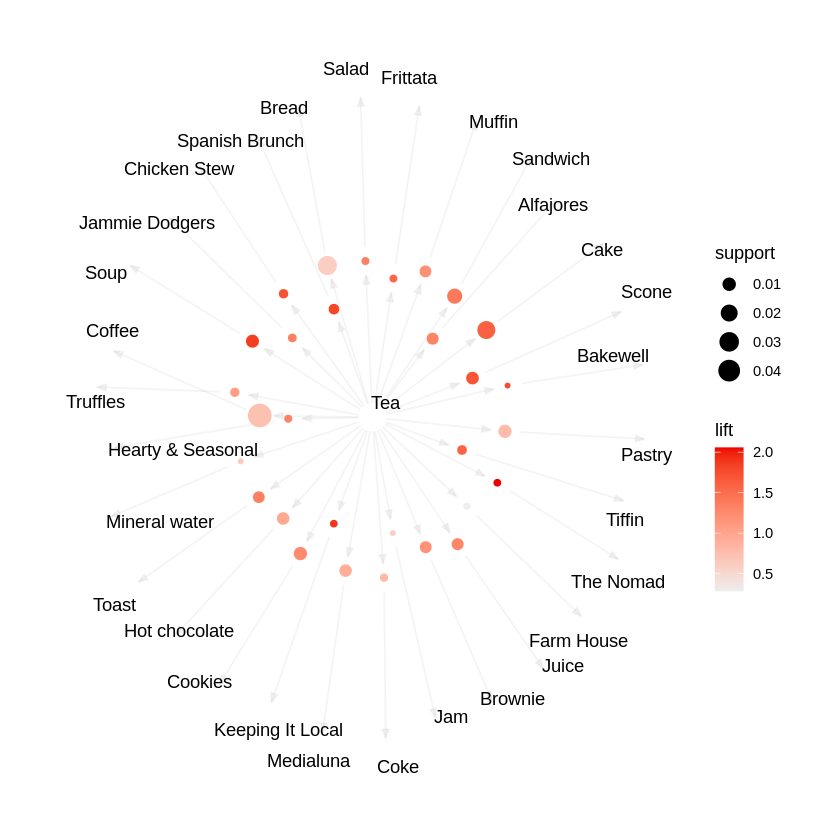

In [40]:
options(max.print = 500000)
new <- subset(apriori_rules, (lhs %ain% c("Tea")))
inspect(new)
plot(new,method="graph")